In [39]:
import pymorphy2
from lxml import etree
import collections
import itertools
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from tabulate import tabulate
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
morph = pymorphy2.MorphAnalyzer()
tree = None
with open('opencorpora') as f:
    tree = etree.parse(f)

In [3]:
texts = tree.xpath('/annotation/text')
tokens = tree.xpath('/annotation/text/paragraphs/paragraph/sentence/tokens/token')

In [220]:
pymorphy_grammemes = ['V-oy', 'Anum', 'loct', 'Supr', 'voct', 'masc', 'Name', 'impr', 'futr', 'ablt', 'intr', '3per', 'sing', 'GNdr', 'Litr', 'datv', 'Coll', 'Dist', 'Patr', 'inan', 'Poss', 'Inmx', 'gent', 'perf', 'Infr', 'Qual', 'Anph', 'impf', 'Af-p', 'Abbr', 'V-be', 'pssv', 'past', 'Ms-f', 'plur', 'loc2', 'Adjx', 'indc', 'Pltm', 'ANim', 'accs', 'Orgn', 'Geox', 'gen2', 'V-ej', 'tran', 'Init', 'Apro', 'excl', 'Cmp2', 'Arch', 'Sgtm', 'Coun', 'nomn', 'actv', 'Prnt', 'anim', 'Subx', '2per', 'femn', 'neut', 'Slng', 'Dmns', '1per', 'pres', 'Surn', 'Ques', 'Prdx', 'Fixd']
TroubleToken = collections.namedtuple('TroubleToken', ['token',
                                                       'corpora_lemma', 'morph_lemma',
                                                       'corpora_pos', 'morph_pos',
                                                       'corpora_g', 'morph_g'])

trouble_tokens = []
for token in tokens:
    text = token.get('text')
    results = morph.parse(text)
    if len(results) < 2:
        pass
    else:
        corpora_lemma = token.find('.//l').get('t').lower()
        corpora_g = tuple([g.get('v') for g in token.findall('.//g')])
        corpora_pos = corpora_g[0]
        corpora_g = set(corpora_g).difference(set([corpora_pos]))
        #corpora_g = set([g for g in corpora_g if g in pymorphy_grammemes])
        morph_lemma = results[0].normal_form.lower()
        morph_g = set(results[0].tag._grammemes_tuple[1:])
        morph_pos = results[0].tag._grammemes_tuple[0]
        if morph_g != corpora_g or morph_lemma != corpora_lemma or morph_pos != corpora_pos:
            trouble_tokens.append(TroubleToken(token,
                                               corpora_lemma, morph_lemma,
                                               corpora_pos, morph_pos,
                                               corpora_g, morph_g))
            
print('Total trouble tokens', len(trouble_tokens))

Total trouble tokens 6644


In [111]:
df = pd.DataFrame(trouble_tokens)
df['text'] = df.token.apply(lambda r: r.get('text').lower())
display_columns = ['corpora_lemma', 'morph_lemma', 'corpora_pos', 'morph_pos',
       'corpora_g', 'morph_g', 'text']
df[display_columns].head()

,corpora_lemma,morph_lemma,corpora_pos,morph_pos,corpora_g,morph_g,text
0,нтв,нтв,NOUN,NOUN,"{Sgtm, Abbr, accs, Orgn, inan, sing, neut, Fixd}","{Sgtm, nomn, Orgn, inan, sing, neut, Fixd}",нтв
1,это,это,NPRO,PRCL,"{neut, sing, nomn}",{},это
2,появившийся,появиться,PRTF,PRTF,"{intr, actv, past, perf, gent, plur}","{intr, actv, past, perf, gent, plur}",появившихся
3,отсутствовавший,отсутствовать,PRTF,PRTF,"{intr, actv, past, gent, plur, impf}","{intr, actv, past, gent, plur, impf}",отсутствовавших
4,культура,культура,NOUN,NOUN,"{femn, sing, loct, inan}","{datv, femn, sing, inan}",культуре


In [44]:
print(tabulate(df[display_columns].head(), "firstrow", "fancy_grid"))

╒═════╤═════════════════╤═══════════════╤════════╤════════╤════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════╤═════════════════╕
│   0 │ нтв             │ нтв           │ NOUN   │ NOUN   │ {'Sgtm', 'Abbr', 'accs', 'Orgn', 'inan', 'sing', 'neut', 'Fixd'}   │ {'Sgtm', 'nomn', 'Orgn', 'inan', 'sing', 'neut', 'Fixd'}   │ нтв             │
╞═════╪═════════════════╪═══════════════╪════════╪════════╪════════════════════════════════════════════════════════════════════╪════════════════════════════════════════════════════════════╪═════════════════╡
│   1 │ это             │ это           │ NPRO   │ PRCL   │ {'neut', 'sing', 'nomn'}                                           │ set()                                                      │ это             │
├─────┼─────────────────┼───────────────┼────────┼────────┼────────────────────────────────────────────────────────────────────┼────────────────────────────────────────

In [6]:
print(df[display_columns].head().to_latex())

\begin{tabular}{llllllll}
\toprule
{} &    corpora\_lemma &    morph\_lemma & corpora\_pos & morph\_pos &                                         corpora\_g &                                     morph\_g &             text \\
\midrule
0 &              нтв &            нтв &        NOUN &      NOUN &  \{Sgtm, Abbr, accs, Orgn, inan, sing, neut, Fixd\} &  \{Sgtm, nomn, Orgn, inan, sing, neut, Fixd\} &              нтв \\
1 &              это &            это &        NPRO &      PRCL &                                \{neut, sing, nomn\} &                                          \{\} &              это \\
2 &      появившийся &      появиться &        PRTF &      PRTF &              \{intr, actv, past, perf, gent, plur\} &        \{intr, actv, past, perf, gent, plur\} &      появившихся \\
3 &  отсутствовавший &  отсутствовать &        PRTF &      PRTF &              \{intr, actv, past, gent, plur, impf\} &        \{intr, actv, past, gent, plur, impf\} &  отсутствовавших \\
4 &         к

In [7]:
print('Investigate by POS')

Investigate by POS


/home/boris/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


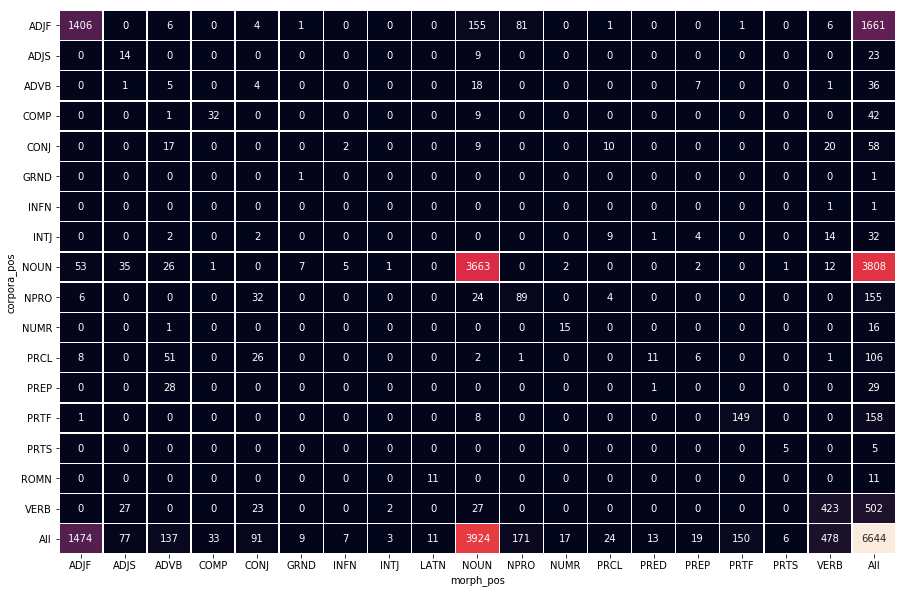

In [8]:
def pd_fill_diagonal(df, value):
    idces = df.index.intersection(df.columns)
    stacked = df.stack(dropna=False)
    stacked.update(pd.Series(value,
                             index=pd.MultiIndex.from_arrays([idces,
                                                              idces])))
    df.loc[:, :] = stacked.unstack()
    
cross = pd.crosstab(df.corpora_pos, [df.morph_pos], margins=True)
plt.figure(figsize=(15, 10))
sns.heatmap(cross, annot=True, cbar=False,  fmt="d", linewidths=.5)
plt.show()

In [9]:
cross = pd.crosstab(df.corpora_pos, [df.morph_pos], normalize='index')
cross

morph_pos,ADJF,ADJS,ADVB,COMP,CONJ,GRND,INFN,INTJ,LATN,NOUN,NPRO,NUMR,PRCL,PRED,PREP,PRTF,PRTS,VERB
corpora_pos,,,,,,,,,,,,,,,,,,
ADJF,0.846478,0.000000,0.003612,0.000000,0.002408,0.000602,0.000000,0.000000,0.0,0.093317,0.048766,0.000000,0.000602,0.000000,0.000000,0.000602,0.000000,0.003612
ADJS,0.000000,0.608696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.391304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ADVB,0.000000,0.027778,0.138889,0.000000,0.111111,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.194444,0.000000,0.000000,0.027778
COMP,0.000000,0.000000,0.023810,0.761905,0.000000,0.000000,0.000000,0.000000,0.0,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CONJ,0.000000,0.000000,0.293103,0.000000,0.000000,0.000000,0.034483,0.000000,0.0,0.155172,0.000000,0.000000,0.172414,0.000000,0.000000,0.000000,0.000000,0.344828
GRND,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
INFN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
INTJ,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.281250,0.031250,0.125000,0.000000,0.000000,0.437500
NOUN,0.013918,0.009191,0.006828,0.000263,0.000000,0.001838,0.001313,0.000263,0.0,0.961922,0.000000,0.000525,0.000000,0.000000,0.000525,0.000000,0.000263,0.003151


In [45]:
print('Let\'s find the most frequently mistaken items')
def pd_fill_diagonal(df, value):
    idces = df.index.intersection(df.columns)
    stacked = df.stack(dropna=False)
    stacked.update(pd.Series(value,
                             index=pd.MultiIndex.from_arrays([idces,
                                                              idces])))
    df.loc[:, :] = stacked.unstack()

# Zero out the diagonal, so we only keep errors in the matrix
cross = pd.crosstab(df.corpora_pos, [df.morph_pos])
totals = cross.sum(axis=1)
print('Amount of homonymy tokens per POS')
print(pd.DataFrame(totals).to_latex())
pd.DataFrame(totals)

Let's find the most frequently mistaken items
Amount of homonymy tokens per POS
\begin{tabular}{lr}
\toprule
{} &     0 \\
corpora\_pos &       \\
\midrule
ADJF        &  1661 \\
ADJS        &    23 \\
ADVB        &    36 \\
COMP        &    42 \\
CONJ        &    58 \\
GRND        &     1 \\
INFN        &     1 \\
INTJ        &    32 \\
NOUN        &  3808 \\
NPRO        &   155 \\
NUMR        &    16 \\
PRCL        &   106 \\
PREP        &    29 \\
PRTF        &   158 \\
PRTS        &     5 \\
ROMN        &    11 \\
VERB        &   502 \\
\bottomrule
\end{tabular}



,0
corpora_pos,
ADJF,1661
ADJS,23
ADVB,36
COMP,42
CONJ,58
GRND,1
INFN,1
INTJ,32
NOUN,3808


In [51]:
pd_fill_diagonal(cross, 0)
cross

morph_pos,ADJF,ADJS,ADVB,COMP,CONJ,GRND,INFN,INTJ,LATN,NOUN,NPRO,NUMR,PRCL,PRED,PREP,PRTF,PRTS,VERB
corpora_pos,,,,,,,,,,,,,,,,,,
ADJF,0,0,6,0,4,1,0,0,0,155,81,0,1,0,0,1,0,6
ADJS,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0
ADVB,0,1,0,0,4,0,0,0,0,18,0,0,0,0,7,0,0,1
COMP,0,0,1,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0
CONJ,0,0,17,0,0,0,2,0,0,9,0,0,10,0,0,0,0,20
GRND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
INFN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
INTJ,0,0,2,0,2,0,0,0,0,0,0,0,9,1,4,0,0,14
NOUN,53,35,26,1,0,7,5,1,0,0,0,2,0,0,2,0,1,12


/home/boris/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


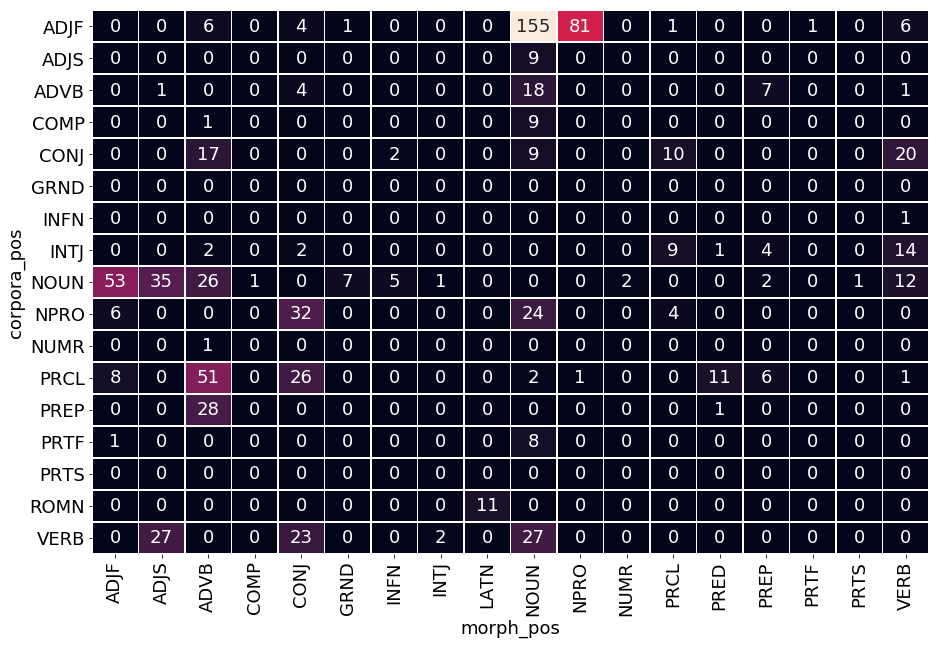

In [52]:
plt.figure(figsize=(15, 10))
sns.heatmap(cross, annot=True, cbar=False,  fmt="d", linewidths=.5)
plt.show()

In [53]:
print('Amount of errors')
total_errors = cross.sum(axis=1)
print(pd.DataFrame(total_errors).to_latex())
pd.DataFrame(total_errors)

Amount of errors
\begin{tabular}{lr}
\toprule
{} &    0 \\
corpora\_pos &      \\
\midrule
ADJF        &  255 \\
ADJS        &    9 \\
ADVB        &   31 \\
COMP        &   10 \\
CONJ        &   58 \\
GRND        &    0 \\
INFN        &    1 \\
INTJ        &   32 \\
NOUN        &  145 \\
NPRO        &   66 \\
NUMR        &    1 \\
PRCL        &  106 \\
PREP        &   29 \\
PRTF        &    9 \\
PRTS        &    0 \\
ROMN        &   11 \\
VERB        &   79 \\
\bottomrule
\end{tabular}



,0
corpora_pos,
ADJF,255
ADJS,9
ADVB,31
COMP,10
CONJ,58
GRND,0
INFN,1
INTJ,32
NOUN,145


In [55]:
tmp_merged = pd.concat([totals, total_errors], axis=1)
tmp_merged.columns = ['count', 'errors']
print(pd.DataFrame(tmp_merged).to_latex())
tmp_merged

\begin{tabular}{lrr}
\toprule
{} &  count &  errors \\
corpora\_pos &        &         \\
\midrule
ADJF        &   1661 &     255 \\
ADJS        &     23 &       9 \\
ADVB        &     36 &      31 \\
COMP        &     42 &      10 \\
CONJ        &     58 &      58 \\
GRND        &      1 &       0 \\
INFN        &      1 &       1 \\
INTJ        &     32 &      32 \\
NOUN        &   3808 &     145 \\
NPRO        &    155 &      66 \\
NUMR        &     16 &       1 \\
PRCL        &    106 &     106 \\
PREP        &     29 &      29 \\
PRTF        &    158 &       9 \\
PRTS        &      5 &       0 \\
ROMN        &     11 &      11 \\
VERB        &    502 &      79 \\
\bottomrule
\end{tabular}



,count,errors
corpora_pos,,
ADJF,1661,255
ADJS,23,9
ADVB,36,31
COMP,42,10
CONJ,58,58
GRND,1,0
INFN,1,1
INTJ,32,32
NOUN,3808,145


In [14]:
print('Top 10 most frequent errors')
grouped = df.groupby(['corpora_pos', 'morph_pos']).size().reset_index()
grouped = grouped.rename({0: 'count'}, axis=1)
grouped.sort_values(by='count', ascending=False)

print(grouped[grouped.corpora_pos != grouped.morph_pos].sort_values(by='count', ascending=False).head(10).to_latex())
grouped[grouped.corpora_pos != grouped.morph_pos].sort_values(by='count', ascending=False).head(10)

Top 10 most frequent errors
\begin{tabular}{lllr}
\toprule
{} & corpora\_pos & morph\_pos &  count \\
\midrule
4  &        ADJF &      NOUN &    155 \\
5  &        ADJF &      NPRO &     81 \\
33 &        NOUN &      ADJF &     53 \\
53 &        PRCL &      ADVB &     51 \\
34 &        NOUN &      ADJS &     35 \\
46 &        NPRO &      CONJ &     32 \\
60 &        PREP &      ADVB &     28 \\
70 &        VERB &      NOUN &     27 \\
67 &        VERB &      ADJS &     27 \\
54 &        PRCL &      CONJ &     26 \\
\bottomrule
\end{tabular}



,corpora_pos,morph_pos,count
4,ADJF,NOUN,155
5,ADJF,NPRO,81
33,NOUN,ADJF,53
53,PRCL,ADVB,51
34,NOUN,ADJS,35
46,NPRO,CONJ,32
60,PREP,ADVB,28
70,VERB,NOUN,27
67,VERB,ADJS,27
54,PRCL,CONJ,26


In [56]:
print('All pairs counts')
grouped = df.groupby(['corpora_pos', 'morph_pos']).size().reset_index()
grouped = grouped.rename({0: 'count'}, axis=1)
grouped

All pairs counts


,corpora_pos,morph_pos,count
0,ADJF,ADJF,1406
1,ADJF,ADVB,6
2,ADJF,CONJ,4
3,ADJF,GRND,1
4,ADJF,NOUN,155
5,ADJF,NPRO,81
6,ADJF,PRCL,1
7,ADJF,PRTF,1
8,ADJF,VERB,6
9,ADJS,ADJS,14


In [57]:
print('Top 10 most frequent relative errors')
grouped = df.groupby(['corpora_pos', 'morph_pos']).size().reset_index()
grouped = grouped.rename({0: 'count'}, axis=1)
grouped

grouped['total_count'] = pos_count= grouped.groupby('corpora_pos')['count'].transform('sum')
#df2['prod_count'] = df2['prod_count'].div(a)

grouped['rel_count'] = grouped['count'].div(pos_count)
grouped
grouped.sort_values(by='rel_count', ascending=False)

print(grouped[grouped.corpora_pos != grouped.morph_pos].sort_values(by='rel_count', ascending=False).head(10).to_latex())
#grouped[grouped.corpora_pos != grouped.morph_pos].sort_values(by='rel_count', ascending=False).head(10)
grouped.sort_values(by='rel_count', ascending=False).head(10)

Top 10 most frequent relative errors
\begin{tabular}{lllrrr}
\toprule
{} & corpora\_pos & morph\_pos &  count &  total\_count &  rel\_count \\
\midrule
26 &        INFN &      VERB &      1 &            1 &   1.000000 \\
66 &        ROMN &      LATN &     11 &           11 &   1.000000 \\
60 &        PREP &      ADVB &     28 &           29 &   0.965517 \\
14 &        ADVB &      NOUN &     18 &           36 &   0.500000 \\
53 &        PRCL &      ADVB &     51 &          106 &   0.481132 \\
32 &        INTJ &      VERB &     14 &           32 &   0.437500 \\
10 &        ADJS &      NOUN &      9 &           23 &   0.391304 \\
24 &        CONJ &      VERB &     20 &           58 &   0.344828 \\
20 &        CONJ &      ADVB &     17 &           58 &   0.293103 \\
29 &        INTJ &      PRCL &      9 &           32 &   0.281250 \\
\bottomrule
\end{tabular}



,corpora_pos,morph_pos,count,total_count,rel_count
25,GRND,GRND,1,1,1.000000
66,ROMN,LATN,11,11,1.000000
65,PRTS,PRTS,5,5,1.000000
26,INFN,VERB,1,1,1.000000
60,PREP,ADVB,28,29,0.965517
40,NOUN,NOUN,3663,3808,0.961922
64,PRTF,PRTF,149,158,0.943038
51,NUMR,NUMR,15,16,0.937500
0,ADJF,ADJF,1406,1661,0.846478
71,VERB,VERB,423,502,0.842629


In [91]:
df[df['corpora_pos'] == 'INFN'].shape

(1, 8)

In [16]:
print('Top 10 most frequent relative errors')
grouped = df.groupby(['corpora_pos', 'morph_pos']).size().reset_index()
grouped = grouped.rename({0: 'count'}, axis=1)

grouped['total_count'] = pos_count= grouped.groupby('corpora_pos')['count'].transform('sum')
#df2['prod_count'] = df2['prod_count'].div(a)

grouped['rel_count'] = grouped['count'].div(pos_count)
grouped
grouped.sort_values(by='rel_count', ascending=False)

print(grouped[grouped.corpora_pos != grouped.morph_pos].sort_values(by='rel_count', ascending=False).head(10).to_latex())
grouped[grouped.corpora_pos != grouped.morph_pos].sort_values(by='rel_count', ascending=False).head(10)

Top 10 most frequent relative errors
\begin{tabular}{lllrrr}
\toprule
{} & corpora\_pos & morph\_pos &  count &  total\_count &  rel\_count \\
\midrule
26 &        INFN &      VERB &      1 &            1 &   1.000000 \\
66 &        ROMN &      LATN &     11 &           11 &   1.000000 \\
60 &        PREP &      ADVB &     28 &           29 &   0.965517 \\
14 &        ADVB &      NOUN &     18 &           36 &   0.500000 \\
53 &        PRCL &      ADVB &     51 &          106 &   0.481132 \\
32 &        INTJ &      VERB &     14 &           32 &   0.437500 \\
10 &        ADJS &      NOUN &      9 &           23 &   0.391304 \\
24 &        CONJ &      VERB &     20 &           58 &   0.344828 \\
20 &        CONJ &      ADVB &     17 &           58 &   0.293103 \\
29 &        INTJ &      PRCL &      9 &           32 &   0.281250 \\
\bottomrule
\end{tabular}



,corpora_pos,morph_pos,count,total_count,rel_count
26,INFN,VERB,1,1,1.000000
66,ROMN,LATN,11,11,1.000000
60,PREP,ADVB,28,29,0.965517
14,ADVB,NOUN,18,36,0.500000
53,PRCL,ADVB,51,106,0.481132
32,INTJ,VERB,14,32,0.437500
10,ADJS,NOUN,9,23,0.391304
24,CONJ,VERB,20,58,0.344828
20,CONJ,ADVB,17,58,0.293103
29,INTJ,PRCL,9,32,0.281250


In [17]:
error_pairs = pd.concat([cross.idxmax(axis=1), cross.max(axis=1)], axis=1)
error_pairs.columns = ['morph_pos', 'error_rate']
error_pairs.sort_values(by='error_rate', ascending=False)

,morph_pos,error_rate
corpora_pos,,
ADJF,NOUN,155
NOUN,ADJF,53
PRCL,ADVB,51
NPRO,CONJ,32
PREP,ADVB,28
VERB,ADJS,27
CONJ,VERB,20
ADVB,NOUN,18
INTJ,VERB,14


In [85]:
print('Correct rate per POS')
relative_errors = total_errors/totals
correct_rate = pd.DataFrame(100-relative_errors.sort_values().round(3)*100)
correct_rate.columns=['correct_rate']
print(correct_rate.to_latex())
correct_rate

Correct rate per POS
\begin{tabular}{lr}
\toprule
{} &  correct\_rate \\
corpora\_pos &               \\
\midrule
PRTS        &         100.0 \\
GRND        &         100.0 \\
NOUN        &          96.2 \\
PRTF        &          94.3 \\
NUMR        &          93.8 \\
ADJF        &          84.6 \\
VERB        &          84.3 \\
COMP        &          76.2 \\
ADJS        &          60.9 \\
NPRO        &          57.4 \\
ADVB        &          13.9 \\
INFN        &           0.0 \\
INTJ        &           0.0 \\
ROMN        &           0.0 \\
PRCL        &           0.0 \\
PREP        &           0.0 \\
CONJ        &           0.0 \\
\bottomrule
\end{tabular}



,correct_rate
corpora_pos,
PRTS,100.0
GRND,100.0
NOUN,96.2
PRTF,94.3
NUMR,93.8
ADJF,84.6
VERB,84.3
COMP,76.2
ADJS,60.9


Fraction of errors of total amount of tokens


/home/boris/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


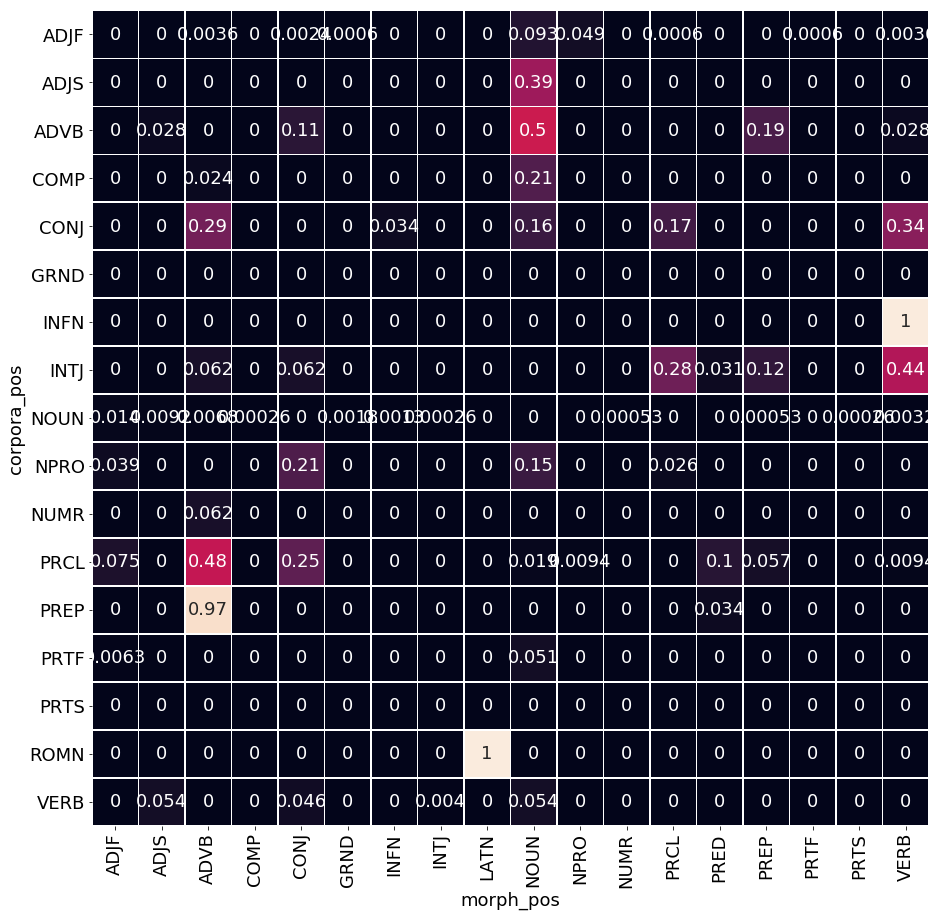

In [76]:
print('Fraction of errors of total amount of tokens')
errors_fraction = cross.div(totals, axis=0)

plt.figure(figsize=(15, 15))
sns.heatmap(errors_fraction, annot=True, cbar=False, linewidths=.5)
plt.show()

In [78]:
error_pairs = pd.concat([errors_fraction.idxmax(axis=1), errors_fraction.max(axis=1)], axis=1)
error_pairs.columns = ['morph_pos', 'error_rate']
error_pairs['correct_rate'] = 1 - error_pairs.error_rate
error_pairs.sort_values(by='correct_rate', ascending=False)

,morph_pos,error_rate,correct_rate
corpora_pos,,,
GRND,ADJF,0.000000,1.000000
PRTS,ADJF,0.000000,1.000000
NOUN,ADJF,0.013918,0.986082
PRTF,NOUN,0.050633,0.949367
VERB,ADJS,0.053785,0.946215
NUMR,ADVB,0.062500,0.937500
ADJF,NOUN,0.093317,0.906683
NPRO,CONJ,0.206452,0.793548
COMP,NOUN,0.214286,0.785714


In [112]:
print('Investigate by morphological stuff')

Investigate by morphological stuff


In [113]:
df_tags = df[(df.corpora_pos == df.morph_pos)]# & (df.corpora_g != df.morph_g)]
print(df_tags.shape)
df_tags.head()

(5802, 8)


,token,corpora_lemma,morph_lemma,corpora_pos,morph_pos,corpora_g,morph_g,text
0,[[[<Element l at 0x7f6abf6eed88>]]],нтв,нтв,NOUN,NOUN,"{Sgtm, Abbr, accs, Orgn, inan, sing, neut, Fixd}","{Sgtm, nomn, Orgn, inan, sing, neut, Fixd}",нтв
2,[[[<Element l at 0x7f6abf6eed88>]]],появившийся,появиться,PRTF,PRTF,"{intr, actv, past, perf, gent, plur}","{intr, actv, past, perf, gent, plur}",появившихся
3,[[[<Element l at 0x7f6abf6eed88>]]],отсутствовавший,отсутствовать,PRTF,PRTF,"{intr, actv, past, gent, plur, impf}","{intr, actv, past, gent, plur, impf}",отсутствовавших
4,[[[<Element l at 0x7f6abf6eed88>]]],культура,культура,NOUN,NOUN,"{femn, sing, loct, inan}","{datv, femn, sing, inan}",культуре
5,[[[<Element l at 0x7f6abf6eed88>]]],один,один,ADJF,ADJF,"{Anum, sing, gent, Apro, femn}","{femn, sing, gent, Apro}",одной


In [114]:
df_tags['g_diff'] = df_tags.apply(lambda r: r.corpora_g.difference(r.morph_g), axis=1).apply(str)
print('df_tags.shape')
df_tags.g_diff.head()

df_tags.shape


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    {'Abbr', 'accs'}
2               set()
3               set()
4            {'loct'}
5            {'Anum'}
Name: g_diff, dtype: object

In [182]:
print('Total amount of tokens per POS')
#total_counts = df_tags.groupby(['corpora_pos'])['token'].count().reset_index()
total_counts = df_tags['corpora_pos'].value_counts().reset_index()
total_counts.columns = ['corpora_pos', 'token']
total_counts

Total amount of tokens per POS


,corpora_pos,token
0,NOUN,3663
1,ADJF,1406
2,VERB,423
3,PRTF,149
4,NPRO,89
5,COMP,32
6,NUMR,15
7,ADJS,14
8,PRTS,5
9,ADVB,5


In [183]:
print('Total amount of correct resolutions')
correct = df_tags[df_tags.g_diff == 'set()']
resolved_counts = correct['corpora_pos'].value_counts().reset_index()
resolved_counts.columns = ['corpora_pos', 'correct_token']
#resolved_counts['correct fraction'] = resolved_counts['token']/total_counts['token']
print(resolved_counts.to_latex())
#resolved_counts.sort_values(by=['token', 'correct fraction'], ascending=False)
resolved_counts

Total amount of correct resolutions
\begin{tabular}{llr}
\toprule
{} & corpora\_pos &  correct\_token \\
\midrule
0 &        VERB &            423 \\
1 &        NOUN &            367 \\
2 &        PRTF &            102 \\
3 &        ADJF &             69 \\
4 &        COMP &             31 \\
5 &        ADJS &             14 \\
6 &        PRTS &              5 \\
7 &        NUMR &              4 \\
8 &        GRND &              1 \\
\bottomrule
\end{tabular}



,corpora_pos,correct_token
0,VERB,423
1,NOUN,367
2,PRTF,102
3,ADJF,69
4,COMP,31
5,ADJS,14
6,PRTS,5
7,NUMR,4
8,GRND,1


In [184]:
#total_counts['correct fraction'] = resolved_counts['correct fraction']
total_counts_fraction = total_counts.merge(resolved_counts, how='outer', on='corpora_pos').fillna(0)
total_counts_fraction['correct_fraction'] = total_counts_fraction['correct_token'] / total_counts_fraction.token
print(total_counts_fraction.to_latex())
total_counts_fraction

\begin{tabular}{llrrr}
\toprule
{} & corpora\_pos &  token &  correct\_token &  correct\_fraction \\
\midrule
0  &        NOUN &   3663 &          367.0 &          0.100191 \\
1  &        ADJF &   1406 &           69.0 &          0.049075 \\
2  &        VERB &    423 &          423.0 &          1.000000 \\
3  &        PRTF &    149 &          102.0 &          0.684564 \\
4  &        NPRO &     89 &            0.0 &          0.000000 \\
5  &        COMP &     32 &           31.0 &          0.968750 \\
6  &        NUMR &     15 &            4.0 &          0.266667 \\
7  &        ADJS &     14 &           14.0 &          1.000000 \\
8  &        PRTS &      5 &            5.0 &          1.000000 \\
9  &        ADVB &      5 &            0.0 &          0.000000 \\
10 &        GRND &      1 &            1.0 &          1.000000 \\
\bottomrule
\end{tabular}



,corpora_pos,token,correct_token,correct_fraction
0,NOUN,3663,367.0,0.100191
1,ADJF,1406,69.0,0.049075
2,VERB,423,423.0,1.000000
3,PRTF,149,102.0,0.684564
4,NPRO,89,0.0,0.000000
5,COMP,32,31.0,0.968750
6,NUMR,15,4.0,0.266667
7,ADJS,14,14.0,1.000000
8,PRTS,5,5.0,1.000000
9,ADVB,5,0.0,0.000000


In [186]:
print('Difference length')
df_tags['g_diff_len'] = df_tags.apply(lambda r: len(r.corpora_g.difference(r.morph_g)), axis=1)
df_tags.g_diff_len.describe()

Difference length


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    5802.000000
mean        1.246639
std         0.867349
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: g_diff_len, dtype: float64

In [192]:
print('Median difference length per POS')
median_diff = df_tags.groupby(['corpora_pos'])['g_diff_len'].median().reset_index()
median_diff.columns = ['corpora_pos', 'median tag difference length']
print(median_diff.to_latex())
median_diff

Median difference length per POS
\begin{tabular}{llr}
\toprule
{} & corpora\_pos &  median tag difference length \\
\midrule
0  &        ADJF &                             1 \\
1  &        ADJS &                             0 \\
2  &        ADVB &                             1 \\
3  &        COMP &                             0 \\
4  &        GRND &                             0 \\
5  &        NOUN &                             1 \\
6  &        NPRO &                             1 \\
7  &        NUMR &                             1 \\
8  &        PRTF &                             0 \\
9  &        PRTS &                             0 \\
10 &        VERB &                             0 \\
\bottomrule
\end{tabular}



,corpora_pos,median tag difference length
0,ADJF,1
1,ADJS,0
2,ADVB,1
3,COMP,0
4,GRND,0
5,NOUN,1
6,NPRO,1
7,NUMR,1
8,PRTF,0
9,PRTS,0


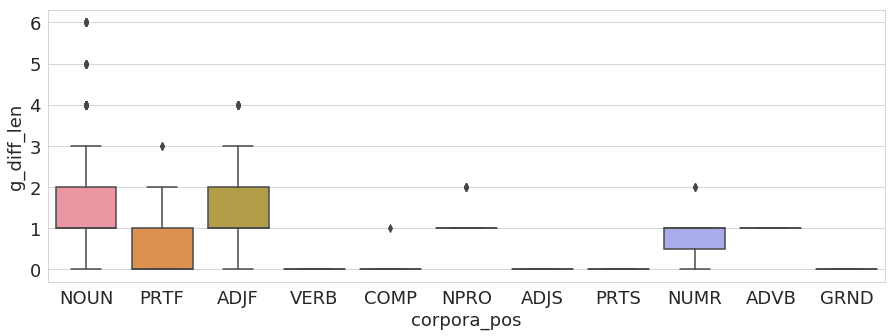

In [197]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
ax = sns.boxplot(x="corpora_pos", y="g_diff_len", data=df_tags)
plt.show()

In [199]:
df_tags[df_tags.corpora_pos=='NOUN'].head()

,token,corpora_lemma,morph_lemma,corpora_pos,morph_pos,corpora_g,morph_g,text,g_diff,g_diff_len
0,[[[<Element l at 0x7f6ab6f75c08>]]],нтв,нтв,NOUN,NOUN,"{Sgtm, Abbr, accs, Orgn, inan, sing, neut, Fixd}","{Sgtm, nomn, Orgn, inan, sing, neut, Fixd}",нтв,"{'Abbr', 'accs'}",2
4,[[[<Element l at 0x7f6ab6f75c08>]]],культура,культура,NOUN,NOUN,"{femn, sing, loct, inan}","{datv, femn, sing, inan}",культуре,{'loct'},1
6,[[[<Element l at 0x7f6ab6f75c08>]]],круг,круг,NOUN,NOUN,"{accs, masc, sing, inan}","{masc, sing, nomn, inan}",круг,{'accs'},1
7,[[[<Element l at 0x7f6ab6f75c08>]]],шпага,шпага,NOUN,NOUN,"{plur, femn, nomn, inan}","{femn, sing, gent, inan}",шпаги,"{'plur', 'nomn'}",2
8,[[[<Element l at 0x7f6ab6f75c08>]]],деньги,деньга,NOUN,NOUN,"{plur, femn, nomn, inan}","{femn, sing, gent, inan}",деньги,"{'plur', 'nomn'}",2


In [201]:
print('Total amount of mostly correct resolutions (up to 1 error)')
mostly_correct = df_tags[df_tags.g_diff_len <= 1]
resolved_counts = mostly_correct['corpora_pos'].value_counts().reset_index()
resolved_counts.columns = ['corpora_pos', 'token']
resolved_counts['(mostly) correct fraction'] = resolved_counts['token']/total_counts['token']
print(resolved_counts.sort_values(by=['token', '(mostly) correct fraction'], ascending=False).to_latex())
resolved_counts.sort_values(by=['token', '(mostly) correct fraction'], ascending=False)

Total amount of mostly correct resolutions (up to 1 error)
\begin{tabular}{llrr}
\toprule
{} & corpora\_pos &  token &  (mostly) correct fraction \\
\midrule
0  &        NOUN &   2164 &                   0.590773 \\
1  &        ADJF &    925 &                   0.657895 \\
2  &        VERB &    423 &                   1.000000 \\
3  &        PRTF &    140 &                   0.939597 \\
4  &        NPRO &     82 &                   0.921348 \\
5  &        COMP &     32 &                   1.000000 \\
6  &        ADJS &     14 &                   0.933333 \\
7  &        NUMR &     12 &                   0.857143 \\
8  &        PRTS &      5 &                   1.000000 \\
9  &        ADVB &      5 &                   1.000000 \\
10 &        GRND &      1 &                   1.000000 \\
\bottomrule
\end{tabular}



,corpora_pos,token,(mostly) correct fraction
0,NOUN,2164,0.590773
1,ADJF,925,0.657895
2,VERB,423,1.000000
3,PRTF,140,0.939597
4,NPRO,82,0.921348
5,COMP,32,1.000000
6,ADJS,14,0.933333
7,NUMR,12,0.857143
8,PRTS,5,1.000000
9,ADVB,5,1.000000


In [29]:
df_tags = df_tags[df_tags.g_diff != 'set()']
print('df_tags.shape')
df_tags.g_diff.head()

df_tags.shape


0    {'Abbr', 'accs'}
4            {'loct'}
5            {'Anum'}
6            {'accs'}
7    {'plur', 'nomn'}
Name: g_diff, dtype: object

In [205]:
print('Top 10 occuring tag differences')
diff_counts = pd.DataFrame(df_tags[df_tags.g_diff != 'set()'].g_diff.apply(str).value_counts().head(10))
print(diff_counts.to_latex())
diff_counts

Top 10 occuring tag differences
\begin{tabular}{lr}
\toprule
{} &  g\_diff \\
\midrule
\{'plur', 'nomn'\} &     688 \\
\{'accs'\}         &     639 \\
\{'loct'\}         &     542 \\
\{'nomn'\}         &     469 \\
\{'gent'\}         &     293 \\
\{'plur', 'accs'\} &     281 \\
\{'datv'\}         &     210 \\
\{'inan', 'accs'\} &     208 \\
\{'neut'\}         &     164 \\
\{'ablt'\}         &     131 \\
\bottomrule
\end{tabular}



,g_diff
"{'plur', 'nomn'}",688
{'accs'},639
{'loct'},542
{'nomn'},469
{'gent'},293
"{'plur', 'accs'}",281
{'datv'},210
"{'inan', 'accs'}",208
{'neut'},164
{'ablt'},131


In [209]:
print('Top morph tag differences')
diff_counts_per_pos = df_tags[df_tags.g_diff != 'set()'].groupby(['corpora_pos', 'g_diff'])['token'].count().reset_index().sort_values(by='token', ascending=False).head(10)
print(diff_counts_per_pos.to_latex())
diff_counts_per_pos

Top morph tag differences
\begin{tabular}{lllr}
\toprule
{} & corpora\_pos &            g\_diff &  token \\
\midrule
185 &        NOUN &  \{'plur', 'nomn'\} &    688 \\
112 &        NOUN &          \{'accs'\} &    606 \\
165 &        NOUN &          \{'nomn'\} &    412 \\
168 &        NOUN &  \{'plur', 'accs'\} &    281 \\
143 &        NOUN &          \{'loct'\} &    265 \\
33  &        ADJF &          \{'loct'\} &    249 \\
32  &        ADJF &  \{'inan', 'accs'\} &    201 \\
138 &        NOUN &          \{'gent'\} &    184 \\
122 &        NOUN &          \{'datv'\} &    155 \\
45  &        ADJF &          \{'neut'\} &    153 \\
\bottomrule
\end{tabular}



,corpora_pos,g_diff,token
185,NOUN,"{'plur', 'nomn'}",688
112,NOUN,{'accs'},606
165,NOUN,{'nomn'},412
168,NOUN,"{'plur', 'accs'}",281
143,NOUN,{'loct'},265
33,ADJF,{'loct'},249
32,ADJF,"{'inan', 'accs'}",201
138,NOUN,{'gent'},184
122,NOUN,{'datv'},155
45,ADJF,{'neut'},153


In [218]:
print('Top morph tag differences per POS')
top_diff_per_pos = df_tags[df_tags.g_diff != 'set()'].groupby(['corpora_pos', 'g_diff'])['token'].count().sort_values(ascending=True).groupby(level=0).tail(1).reset_index().sort_values(by='token', ascending=False)
print(top_diff_per_pos.to_latex())
top_diff_per_pos

Top morph tag differences per POS
\begin{tabular}{lllr}
\toprule
{} & corpora\_pos &            g\_diff &  token \\
\midrule
6 &        NOUN &  \{'plur', 'nomn'\} &    688 \\
5 &        ADJF &          \{'loct'\} &    249 \\
4 &        NPRO &          \{'gent'\} &     39 \\
3 &        PRTF &          \{'loct'\} &     12 \\
1 &        ADVB &          \{'Prdx'\} &      5 \\
2 &        NUMR &          \{'loct'\} &      5 \\
0 &        COMP &          \{'Qual'\} &      1 \\
\bottomrule
\end{tabular}



,corpora_pos,g_diff,token
6,NOUN,"{'plur', 'nomn'}",688
5,ADJF,{'loct'},249
4,NPRO,{'gent'},39
3,PRTF,{'loct'},12
1,ADVB,{'Prdx'},5
2,NUMR,{'loct'},5
0,COMP,{'Qual'},1


In [33]:
print('Investigate lemma homonymy')

Investigate lemma homonymy


In [221]:
df_lemma = df[(df.corpora_pos == df.morph_pos) & (df.corpora_g == df.morph_g)]
print(df_lemma.shape)
df_lemma.head()

(656, 8)


,token,corpora_lemma,morph_lemma,corpora_pos,morph_pos,corpora_g,morph_g,text
2,[[[<Element l at 0x7f6ab6f16848>]]],появившийся,появиться,PRTF,PRTF,"{intr, actv, past, perf, gent, plur}","{intr, actv, past, perf, gent, plur}",появившихся
3,[[[<Element l at 0x7f6ab6f16848>]]],отсутствовавший,отсутствовать,PRTF,PRTF,"{intr, actv, past, gent, plur, impf}","{intr, actv, past, gent, plur, impf}",отсутствовавших
9,[[[<Element l at 0x7f6ab6f16848>]]],бываю,бывать,VERB,VERB,"{intr, impf, sing, past, neut, indc}","{intr, impf, sing, past, neut, indc}",бывало
23,[[[<Element l at 0x7f6ab6f16848>]]],первый,один,ADJF,ADJF,"{femn, sing, Anum, gent}","{femn, sing, Anum, gent}",первой
26,[[[<Element l at 0x7f6ab6f16848>]]],могу,мочь,VERB,VERB,"{3per, intr, pres, sing, impf, indc}","{3per, intr, pres, sing, impf, indc}",может


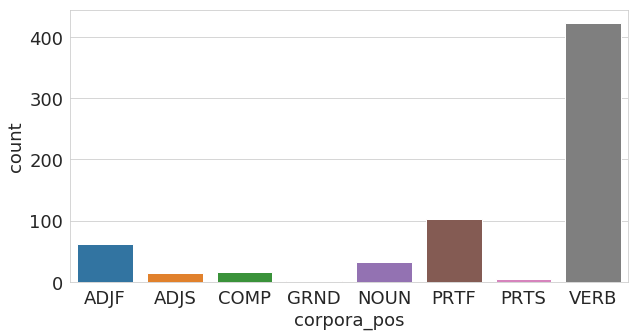

In [233]:
lemma_per_pos = df_lemma.groupby(['corpora_pos'])['text'].count().reset_index()
lemma_per_pos.columns = ['corpora_pos', 'count']
plt.figure(figsize=(10,5))
sns.barplot(x='corpora_pos', y='count', data = lemma_per_pos)
plt.show()

In [234]:
df_lemma[df_lemma.corpora_lemma == df_lemma.morph_lemma]

,token,corpora_lemma,morph_lemma,corpora_pos,morph_pos,corpora_g,morph_g,text


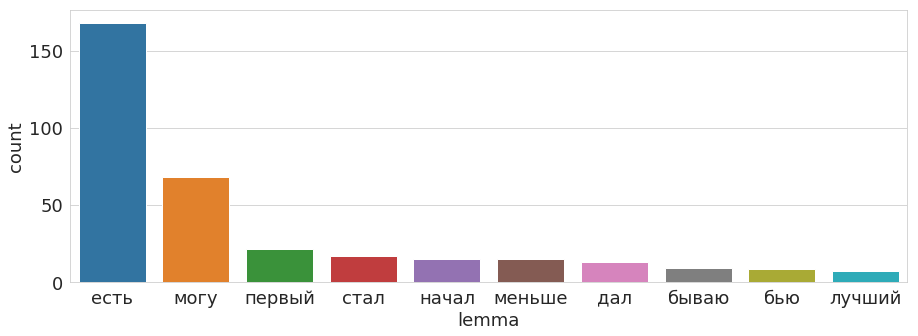

In [241]:
counts = df_lemma.corpora_lemma.value_counts().head(10).reset_index()
counts.columns = ['lemma', 'count']
plt.figure(figsize=(15,5))
sns.barplot(x='lemma', y='count', data = counts)
plt.show()